In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#### Load the csv file

In [4]:
df_emp = pd.read_csv('emp_attrition.csv')
df_emp.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,Yes,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5
3,42,No,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,3,1
4,43,No,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,3,8


In [5]:
df_emp.dtypes

Age                         int64
Attrition                  object
BusinessTravel             object
Department                 object
DistanceFromHome            int64
EducationField             object
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobLevel                    int64
JobRole                    object
JobSatisfaction             int64
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
YearsAtCompany              int64
dtype: object

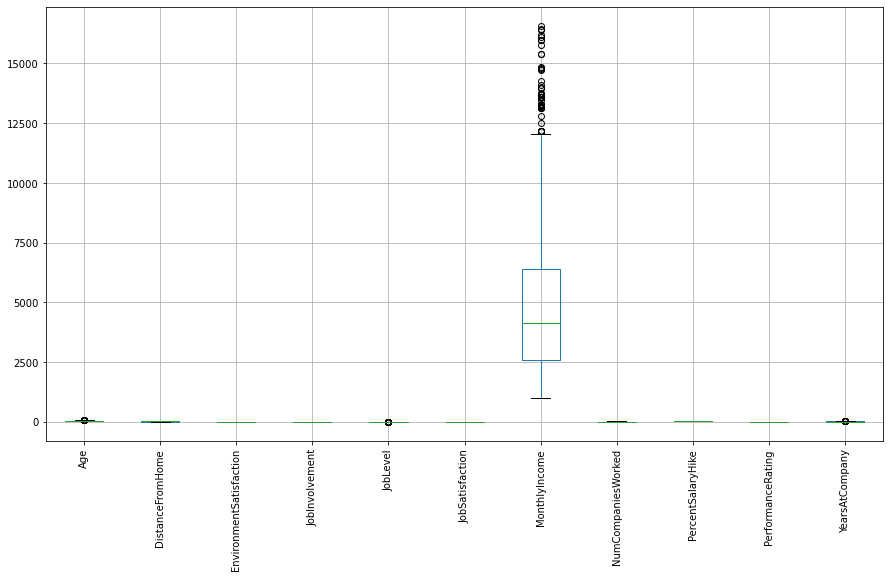

In [6]:
# detect the outliers in the dataset. Remove the outliers
plt.figure(figsize=(15,8))

df_emp.boxplot()
plt.xticks(rotation = 'vertical')
plt.show()

In [7]:
num_cols = df_emp.select_dtypes(include= np.number).columns
num_cols

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'YearsAtCompany'],
      dtype='object')

In [8]:
q1 = df_emp.quantile(0.25)
q3 = df_emp.quantile(0.75)
iqr = q3 - q1
iqr

Age                          11.00
DistanceFromHome             14.00
EnvironmentSatisfaction       2.00
JobInvolvement                1.00
JobLevel                      1.00
JobSatisfaction               2.00
MonthlyIncome              3825.25
NumCompaniesWorked            3.00
PercentSalaryHike             4.00
PerformanceRating             0.00
YearsAtCompany                6.00
dtype: float64

In [9]:
df_emp = df_emp[~((df_emp < (q1 - 1.5 * iqr)) | (df_emp > (q3 + 1.5 * iqr))).any(axis = 1)]
df_emp.shape

(1487, 18)

In [11]:
# Build Decision tree model to predict 

X = df_emp.drop(['Attrition'], axis = 1)
y = df_emp['Attrition']

In [12]:
X_cat = X.select_dtypes('O')
X_cat


,BusinessTravel,Department,EducationField,Gender,JobRole,OverTime
0,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Yes
1,Travel_Rarely,Sales,Medical,Male,Sales Executive,No
2,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,No
3,Travel_Rarely,Research & Development,Medical,Female,Research Scientist,Yes
4,Travel_Frequently,Research & Development,Life Sciences,Female,Manufacturing Director,No
...,...,...,...,...,...,...
1574,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,No
1575,Non-Travel,Research & Development,Technical Degree,Male,Healthcare Representative,No
1577,Travel_Rarely,Sales,Medical,Male,Sales Representative,No
1578,Travel_Frequently,Research & Development,Life Sciences,Female,Manufacturing Director,No


In [13]:
X_num = X.select_dtypes(np.number)
X_num

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,3,1,3,1,1,3348,1,11,3,10
1,32,4,4,1,3,4,10400,1,11,3,14
2,40,9,4,3,1,1,2018,3,14,3,5
3,42,7,2,4,2,2,2372,6,16,3,1
4,43,27,3,3,3,1,10820,8,11,3,8
...,...,...,...,...,...,...,...,...,...,...,...
1574,30,2,2,2,1,4,2720,0,13,3,5
1575,28,24,2,2,3,1,8722,1,12,3,10
1577,30,9,2,3,1,4,1081,1,13,3,1
1578,31,1,3,3,2,1,4148,1,12,3,4


In [14]:
X_cat = pd.get_dummies(X_cat, drop_first = True)
X_cat

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
1575,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1577,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1578,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [15]:
X_final = pd.concat([X_num, X_cat], axis = 1)
X_final

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,...,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,33,3,1,3,1,1,3348,1,11,3,...,1,0,0,0,0,0,1,0,0,1
1,32,4,4,1,3,4,10400,1,11,3,...,1,0,0,0,0,0,0,1,0,0
2,40,9,4,3,1,1,2018,3,14,3,...,1,0,1,0,0,0,0,0,0,0
3,42,7,2,4,2,2,2372,6,16,3,...,0,0,0,0,0,0,1,0,0,1
4,43,27,3,3,3,1,10820,8,11,3,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,30,2,2,2,1,4,2720,0,13,3,...,1,0,1,0,0,0,0,0,0,0
1575,28,24,2,2,3,1,8722,1,12,3,...,1,0,0,0,0,0,0,0,0,0
1577,30,9,2,3,1,4,1081,1,13,3,...,1,0,0,0,0,0,0,0,1,0
1578,31,1,3,3,2,1,4148,1,12,3,...,0,0,0,0,1,0,0,0,0,0


In [16]:
y = y.replace({'Yes': 1, 'No': 0})
y

0       1
1       1
2       1
3       0
4       0
       ..
1574    0
1575    1
1577    1
1578    0
1579    1
Name: Attrition, Length: 1487, dtype: int64

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier(max_depth = 7)
dtf.fit(X_final, y)

dtf.score(X_final, y)

0.9193006052454606

In [19]:
feat_imp = pd.DataFrame(columns = ['Feature', 'Score'])
feat_imp['Feature'] = X_final.columns
feat_imp['Score'] = dtf.feature_importances_
feat_imp.sort_values(by = 'Score', ascending = False)

# Age, MonthlyIncome, Overtime

,Feature,Score
0,Age,0.181570
6,MonthlyIncome,0.164861
10,YearsAtCompany,0.109608
29,OverTime_Yes,0.101559
1,DistanceFromHome,0.091884
2,EnvironmentSatisfaction,0.046923
7,NumCompaniesWorked,0.042087
19,EducationField_Technical Degree,0.034412
14,Department_Sales,0.032643
3,JobInvolvement,0.030783


In [20]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred = dtf.predict(X_final)
roc_auc_score(y, y_pred)

0.9205055872042068

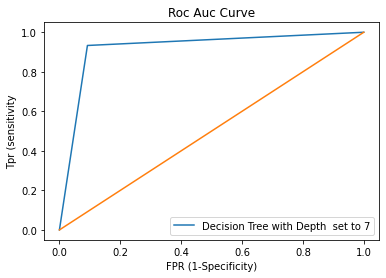

In [21]:
fpr, tpr, th = roc_curve(y, y_pred)

plt.plot(fpr, tpr, label = 'Decision Tree with Depth  set to 7')
plt.plot([1,0], [1, 0])
plt.xlabel('FPR (1-Specificity)')
plt.ylabel('Tpr (sensitivity')
plt.title('Roc Auc Curve')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import confusion_matrix
conf_mat_list = confusion_matrix(y, y_pred= y_pred)
conf_mat = pd.DataFrame(conf_mat_list, columns= ['predicted attrition : NO', 'predicted attrition : yes'], index=['actual attrition : NO', 'actual attrition : yes'])
conf_mat

,predicted attrition : NO,predicted attrition : yes
actual attrition : NO,740,75
actual attrition : yes,45,627


<AxesSubplot:>

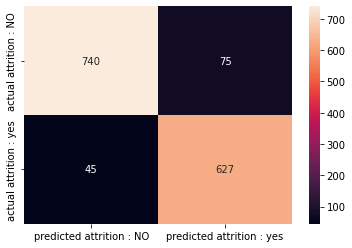

In [23]:
sns.heatmap(conf_mat, annot=True, fmt = 'd')

In [24]:
tn = conf_mat_list[0][0]
fp = conf_mat_list[0][1]
fn = conf_mat_list[1][0]
tp = conf_mat_list[1][1]

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
misclassified = (fp + fn) / (tp + tn + fp + fn)
classified = (tp + tn) / (tp + tn + fp + fn)

print(sensitivity)
print(specificity)
print(misclassified)
print(classified)

0.9330357142857143
0.9079754601226994
0.08069939475453934
0.9193006052454606


In [25]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtf, X_final, y, cv = 10)
scores

array([0.83892617, 0.83892617, 0.86577181, 0.83892617, 0.82550336,
       0.86577181, 0.83892617, 0.87837838, 0.79054054, 0.75675676])

In [26]:
scores.mean()

0.8338427353528024

In [27]:
# best value of hyperparameters "criterion", "max_depth", and "min_samples_split".

In [28]:
params = {'criterion': ['entropy', 'gini'],
 'max_depth': range(2, 10),
 'min_samples_split': range(2,10)}


In [29]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), params)
grid.fit(X_final, y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(2, 10),
                         'min_samples_split': range(2, 10)})

In [30]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 3}

In [ ]:
#decision tree model using the tuned hyperparameters

In [31]:
best_dt = grid.best_estimator_
scores = cross_val_score(best_dt, X_final, y, cv = 10, scoring = 'roc_auc')
scores

array([0.93527596, 0.91902687, 0.92783036, 0.90971969, 0.91226793,
       0.93465599, 0.90034583, 0.93799521, 0.86060439, 0.86861986])

In [32]:
scores.mean()

0.9106342093930158

In [33]:
#decision tree   - cross_val_score(ROC_AUC) - 0.83
#decision tree with hyperparamerts - cross_val_score(ROC_AUC) - 0.91

In [34]:
#RandomForestClassifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators = 3)
rf.fit(X_final, y)
rf.score(X_final, y)

0.9912575655682583

In [36]:
y_pred = rf.predict(X_final)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       815
           1       0.99      0.99      0.99       672

    accuracy                           0.99      1487
   macro avg       0.99      0.99      0.99      1487
weighted avg       0.99      0.99      0.99      1487



In [37]:
#find the best value of hyperparameters

In [38]:
params = {'criterion' : ['entropy', 'gini'],
    'n_estimators' : [90, 100, 150, 200],
    'max_depth' : [10, 15, 20],
    'min_samples_split' : [2, 5, 8]}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(RandomForestClassifier(), params)
grid.fit(X_final, y)

grid.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_split': 2,
 'n_estimators': 200}

In [39]:
best_rf = grid.best_estimator_
scores = cross_val_score(best_rf, X_final, y, cv = 10, scoring = 'roc_auc')
scores.mean()

0.9932426018850959

In [40]:
#tuned random forest model, find the features that impact the model prediction the most
feat_imp = pd.DataFrame(columns = ['Feature', 'Score'])
feat_imp['Feature'] = X_final.columns
feat_imp['Score'] = best_rf.feature_importances_
feat_imp.sort_values(by = 'Score', ascending = False)


,Feature,Score
6,MonthlyIncome,0.136039
0,Age,0.125786
10,YearsAtCompany,0.088877
1,DistanceFromHome,0.083757
29,OverTime_Yes,0.069303
8,PercentSalaryHike,0.064954
7,NumCompaniesWorked,0.057032
2,EnvironmentSatisfaction,0.050510
5,JobSatisfaction,0.048129
3,JobInvolvement,0.044680


In [42]:
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

# import the XGBoost function for classification
from xgboost import XGBClassifier

import random
from sklearn.metrics import accuracy_score

In [43]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [44]:
#Build a adaboost model with 40 number of estimators to predict whether or not an employee will leave the company 

In [45]:
X_subset= X_final.iloc[:,10:]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_subset, y, random_state = 10, test_size = 0.2)

In [47]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

ada_model.fit(X_train, y_train)

y_pred_full = ada_model.predict(X_test)

print(classification_report(y_test, y_pred_full))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76       170
           1       0.68      0.64      0.66       128

    accuracy                           0.71       298
   macro avg       0.71      0.71      0.71       298
weighted avg       0.71      0.71      0.71       298



In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_full)

Text(0.02, 0.8, "('AUC Score:', 0.7056)")

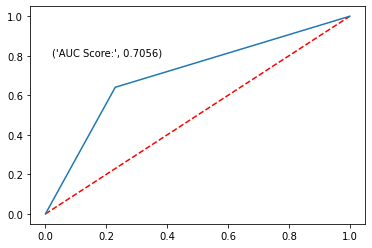

In [50]:
plt.plot([0, 1], [0, 1],'r--')
plt.plot(fpr, tpr)
plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_full),4))) 

In [51]:
cm = confusion_matrix(y_test, y_pred_full)
cm

array([[131,  39],
       [ 46,  82]], dtype=int64)

In [52]:
TN = cm[0][0]
# True Positive from confusion matrix
TP = cm[1][1]
# False Positive from confusion matrix
FP = cm[0][1]
# False N

# True Negative from confusion 
FN = cm[1][0]

# add all the values of a confusion matrix
total = TN + TP + FP + FN

# find the percentage of correctly classified observations
# round the result upto 2 decimal points
correct_classified_percentage = ((TN+TP)/total)*100
print("Percentage of correctly classified observations: ", round(correct_classified_percentage, 2))

# find the percentage of  misclassified observations
# round the result upto 2 decimal points
misclassified_percentage = ((FP+FN)/total)*100
print("Percentage of misclassified observations: ", round(misclassified_percentage, 2))

# find the percentage of  misclassified observations
# round the result upto 2 decimal points
misclassified_percentage = ((FP+FN)/total)*100
print("Percentage of misclassified observations: ", round(misclassified_percentage, 2))

# find the specificity
# round the result upto 4 decimal points
specificity = TN/(TN+FP)
print("\nSpecificity: ", round(specificity, 4))

# find the sensitivity
# round the result upto 4 decimal points
sensitivity = TP/(TP+FN)
print("Sensitivity: ", round(sensitivity, 4))

Percentage of correctly classified observations:  71.48
Percentage of misclassified observations:  28.52
Percentage of misclassified observations:  28.52

Specificity:  0.7706
Sensitivity:  0.6406


In [53]:
#best value of hyperparameters "n_estimators" and "learning_rate" for the adaboost full model

In [54]:
tuned_param= [ { 'n_estimators':[100,120,150,200,300,350],
                  'learning_rate':[0.1,0.01,0.001,0.15,0.015] } ]


ada_grid= GridSearchCV(estimator=ada_model, param_grid= tuned_param, cv=3, n_jobs=-1)


ada_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(n_estimators=40, random_state=10),
             n_jobs=-1,
             param_grid=[{'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015],
                          'n_estimators': [100, 120, 150, 200, 300, 350]}])

In [56]:
ada_grid.best_params_

{'learning_rate': 0.15, 'n_estimators': 300}

In [57]:
#Build a adaboost model using the tuned hyperparameters,

In [58]:
ada_grid= GridSearchCV(estimator=ada_model, param_grid= tuned_param, cv=10, n_jobs=-1)

In [59]:
ada_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(n_estimators=40, random_state=10),
             n_jobs=-1,
             param_grid=[{'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015],
                          'n_estimators': [100, 120, 150, 200, 300, 350]}])

In [60]:
roc_auc_score(y_test, y_pred_full)

0.7056066176470589

In [61]:
#Build the gradient boosting model

In [62]:
gb_model= GradientBoostingClassifier(n_estimators=300,max_depth =5)

gb_model.fit(X_train,y_train)

ypred_gb=gb_model.predict(X_test)

accuracy_score(y_test,ypred_gb)

0.8590604026845637

In [63]:
#best value of hyperparameters

In [64]:
tuned_param= [ { 'n_estimators':[100,120,150,200,300,350],
                  'learning_rate':[0.1,0.01,0.001,0.15,0.015],
                  'max_depth':[2,3,4,5,6] } ]

gb_grid= GridSearchCV(estimator=gb_model, param_grid= tuned_param, cv=3, n_jobs=-1)


gb_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=5,
                                                  n_estimators=300),
             n_jobs=-1,
             param_grid=[{'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015],
                          'max_depth': [2, 3, 4, 5, 6],
                          'n_estimators': [100, 120, 150, 200, 300, 350]}])

In [65]:
gb_grid.best_params_

{'learning_rate': 0.15, 'max_depth': 6, 'n_estimators': 300}

In [66]:
ypred_gb_cv= gb_grid.predict(X_test)

In [67]:
accuracy_score(y_test,ypred_gb_cv)

0.8657718120805369

In [68]:
fpr, tpr, thresholds = roc_curve(y_test, ypred_gb_cv)

Text(0.02, 0.8, "('Acc Score :', 0.87)")

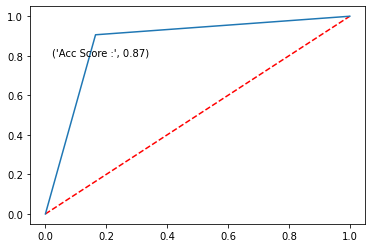

In [69]:
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr)
plt.text(x=0.02, y = 0.8, s=('Acc Score :', round(metrics.roc_auc_score(y_test, ypred_gb_cv),2)))

In [70]:
cm = confusion_matrix(y_test, ypred_gb_cv)
cm

array([[142,  28],
       [ 12, 116]], dtype=int64)

In [71]:
#Build the XGBoost model

In [72]:
xgb_model = XGBClassifier(learning_rate = 0.01, gamma = 2)

In [73]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [74]:
ypred_xgb = xgb_model.predict(X_test)

In [75]:
accuracy_score(y_test, ypred_xgb)

0.7248322147651006

In [76]:
roc_auc_score(y_test, ypred_xgb)

0.7221507352941177

In [77]:
cm = confusion_matrix(y_test, ypred_xgb)
cm

array([[126,  44],
       [ 38,  90]], dtype=int64)

In [78]:
print(classification_report(y_test, ypred_xgb))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       170
           1       0.67      0.70      0.69       128

    accuracy                           0.72       298
   macro avg       0.72      0.72      0.72       298
weighted avg       0.73      0.72      0.73       298



In [79]:
#best value of hyperparameters "

In [80]:
tuned_param =[{'n_estimators':[100, 120, 150], 
               'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015], 
               'gamma' : [2, 3, 4, 5, 6],
               'max_depth':[2, 3, 4, 5, 6]}]

In [81]:
xgb_grid=GridSearchCV(estimator = xgb_model,
                       param_grid = tuned_param,
                       cv = 3,
                       n_jobs = -1)

In [82]:
xgb_grid.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=2, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.01, max_bin=256,
                                     max_cat_to_on..., max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1, ...),
             n_jobs=-1,
             param_grid=[{'gamma': [2, 3, 4, 5, 6],
                          'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015],
                          'max_depth': [2, 3, 4, 5, 6],
                          'n_estimators': [100, 120, 150]}])

In [83]:
xgb_grid.best_params_

{'gamma': 2, 'learning_rate': 0.15, 'max_depth': 6, 'n_estimators': 100}

In [84]:
ypred_xgb_cv = xgb_grid.predict(X_test)

In [85]:
cm = confusion_matrix(y_test, ypred_xgb_cv)
cm

array([[135,  35],
       [ 29,  99]], dtype=int64)

In [86]:
fpr, tpr, thresholds = roc_curve(y_test, ypred_xgb_cv)

Text(0.02, 0.9, "('AUC:', 0.78)")

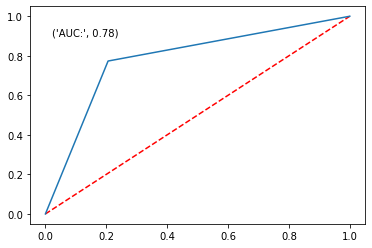

In [87]:
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr)
plt.text(x=0.02, y=0.9,s=('AUC:',round(roc_auc_score(y_test, ypred_xgb_cv),2)))

In [89]:
#stacking technique with the decision tree and Random Forest model as base learners Consider the AdaBoost

In [90]:

base_learners =[('Decision Tree', DecisionTreeClassifier()),
                ('Random Forest', RandomForestClassifier())]

In [91]:
stack_classifier_adaboost=StackingClassifier(estimators = base_learners, final_estimator= AdaBoostClassifier(random_state = 10))

In [92]:
stack_classifier_adaboost.fit(X_train, y_train)

StackingClassifier(estimators=[('Decision Tree', DecisionTreeClassifier()),
                               ('Random Forest', RandomForestClassifier())],
                   final_estimator=AdaBoostClassifier(random_state=10))

In [93]:
y_pred = stack_classifier_adaboost.predict(X_test)

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       170
           1       0.82      0.97      0.89       128

    accuracy                           0.89       298
   macro avg       0.89      0.90      0.89       298
weighted avg       0.91      0.89      0.89       298



In [95]:
#stacking technique with the decision tree and Random Forest model as base learners. Consider the Gradient Boosting

In [96]:
stack_classifier_xgboost = StackingClassifier(estimators = base_learners, 
                                               final_estimator= GradientBoostingClassifier(random_state = 10))

In [97]:
stack_classifier_xgboost.fit(X_train, y_train)

StackingClassifier(estimators=[('Decision Tree', DecisionTreeClassifier()),
                               ('Random Forest', RandomForestClassifier())],
                   final_estimator=GradientBoostingClassifier(random_state=10))

In [98]:
y_pred = stack_classifier_xgboost.predict(X_test)

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89       170
           1       0.82      0.93      0.87       128

    accuracy                           0.88       298
   macro avg       0.88      0.89      0.88       298
weighted avg       0.89      0.88      0.88       298



In [100]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [101]:
y_pred = LR.predict(X_test)

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76       170
           1       0.68      0.64      0.66       128

    accuracy                           0.71       298
   macro avg       0.71      0.71      0.71       298
weighted avg       0.71      0.71      0.71       298



In [103]:
con_mat_list = confusion_matrix(y_test, y_pred= y_pred)
con_mat = pd.DataFrame(con_mat_list, columns= ['predicted attrition : NO', 'predicted attrition : yes'], index=['actual attrition : NO', 'actual attrition : yes'])
con_mat

,predicted attrition : NO,predicted attrition : yes
actual attrition : NO,131,39
actual attrition : yes,46,82


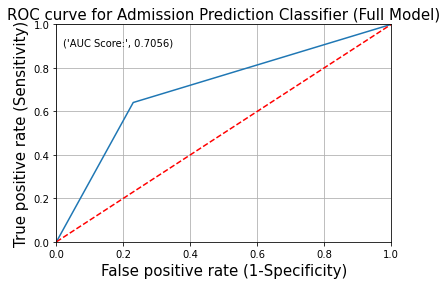

In [104]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])


plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)


plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred),4)))

plt.grid(True)